In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('dataset_test_ds.xlsx')
data.head()

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
data.dtypes

id_karyawan                  int64
departemen                  object
wilayah                     object
pendidikan                  object
jenis_kelamin               object
rekrutmen                   object
jumlah_training              int64
umur                         int64
rating_tahun_lalu          float64
masa_kerja                   int64
KPI_>80%                     int64
penghargaan                  int64
rata_rata_skor_training      int64
dipromosikan                 int64
dtype: object

In [4]:
data.shape

(54808, 14)

In [5]:
data.isnull().sum()

id_karyawan                   0
departemen                    0
wilayah                       0
pendidikan                 2409
jenis_kelamin                 0
rekrutmen                     0
jumlah_training               0
umur                          0
rating_tahun_lalu          4124
masa_kerja                    0
KPI_>80%                      0
penghargaan                   0
rata_rata_skor_training       0
dipromosikan                  0
dtype: int64

There are null values in "pendidikan" and "rating_tahun_lalu"

# 1. Exploratory Data Analysis (EDA)

In [6]:
data.describe()

,id_karyawan,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,54346.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,15152.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,34820.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,54376.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,73881.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,93449.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


- jumlah_training is have a mean of close to 1 and maximum value of 10
- umur is have a mean of close to 35 and maximum value of 60
- rating_tahun_lalu is have a mean of close to 3 and maximum value of 5
- masa_kerja is have a mean of close to 6 and maximum value of 37
- rata_rata_skor_training is have a mean of close to 63 and maximum value of 99

In [7]:
# check duplicates
data.drop_duplicates()

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,18181,Technology,wilayah_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,89743,Operations,wilayah_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,29069,Analytics,wilayah_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,28765,Sales & Marketing,wilayah_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


There are no duplicates

In [8]:
# skewness
data['rating_tahun_lalu'].skew()

-0.3106378431385327

Because skewness value is quite small, I will fill in missing value using mean

In [9]:
data['rating_tahun_lalu'].mean()

3.329255780917055

Since rating_tahun_lalu is a discrete value and the mean value is close to 3, we will use 3 to fill in the missing value

In [10]:
data['rating_tahun_lalu'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: rating_tahun_lalu, dtype: int64

for the mode value is also 3.

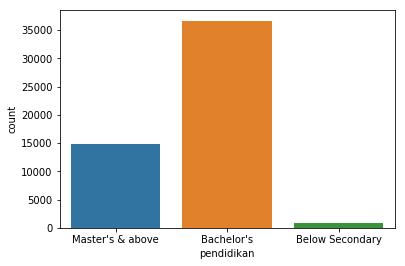

In [11]:
# for categorical missing value, i will fill with the mode
sns.countplot(x='pendidikan', data=data)
plt.show()

### Cleaning Data

In [12]:
# we don't use id_karyawan to analyze data and create a model
data.drop('id_karyawan', axis=1, inplace=True)

In [13]:
data['rating_tahun_lalu'].fillna(3.0, inplace=True)

In [14]:
data['pendidikan'].fillna(data['pendidikan'].mode()[0], inplace=True)

In [15]:
data.isnull().sum()

departemen                 0
wilayah                    0
pendidikan                 0
jenis_kelamin              0
rekrutmen                  0
jumlah_training            0
umur                       0
rating_tahun_lalu          0
masa_kerja                 0
KPI_>80%                   0
penghargaan                0
rata_rata_skor_training    0
dipromosikan               0
dtype: int64

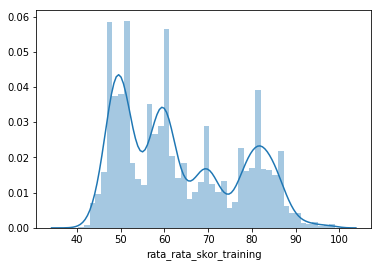

In [16]:
sns.distplot(data['rata_rata_skor_training'])
plt.show()

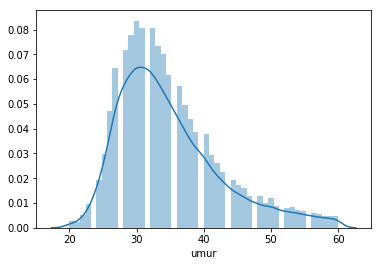

In [17]:
sns.distplot(data['umur'])
plt.show()

Most of the employees are 30 years old and the distribution have a positive skew

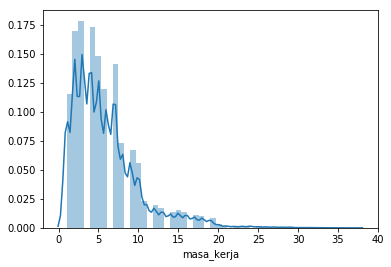

In [18]:
sns.distplot(data['masa_kerja'])
plt.show()

Most of the employees have a masa_kerja of 1-5 years.

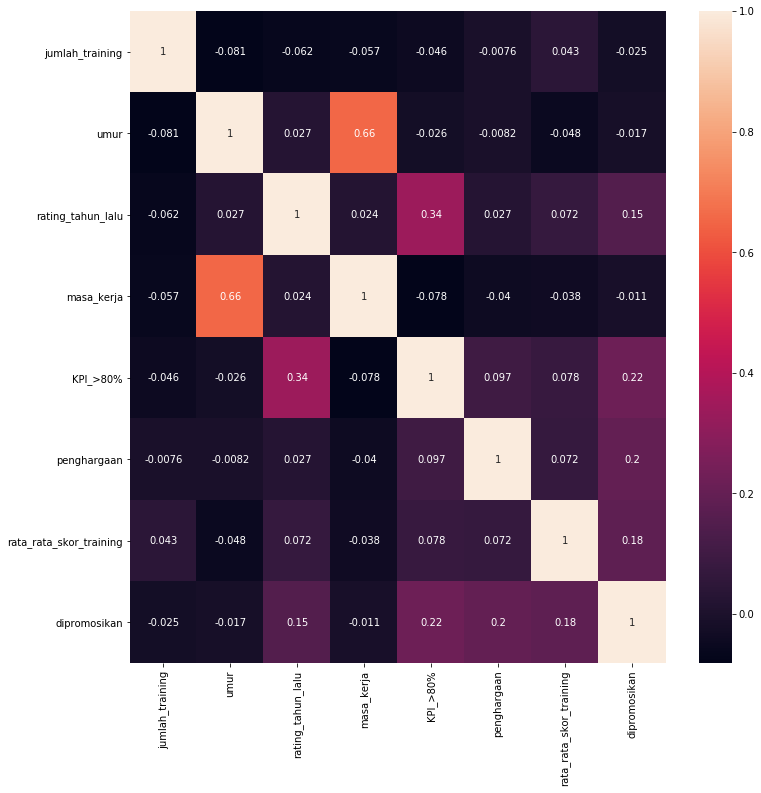

In [19]:
corr = data.corr()

plt.figure(figsize=(12,12))
ax = sns.heatmap(corr, annot=True)

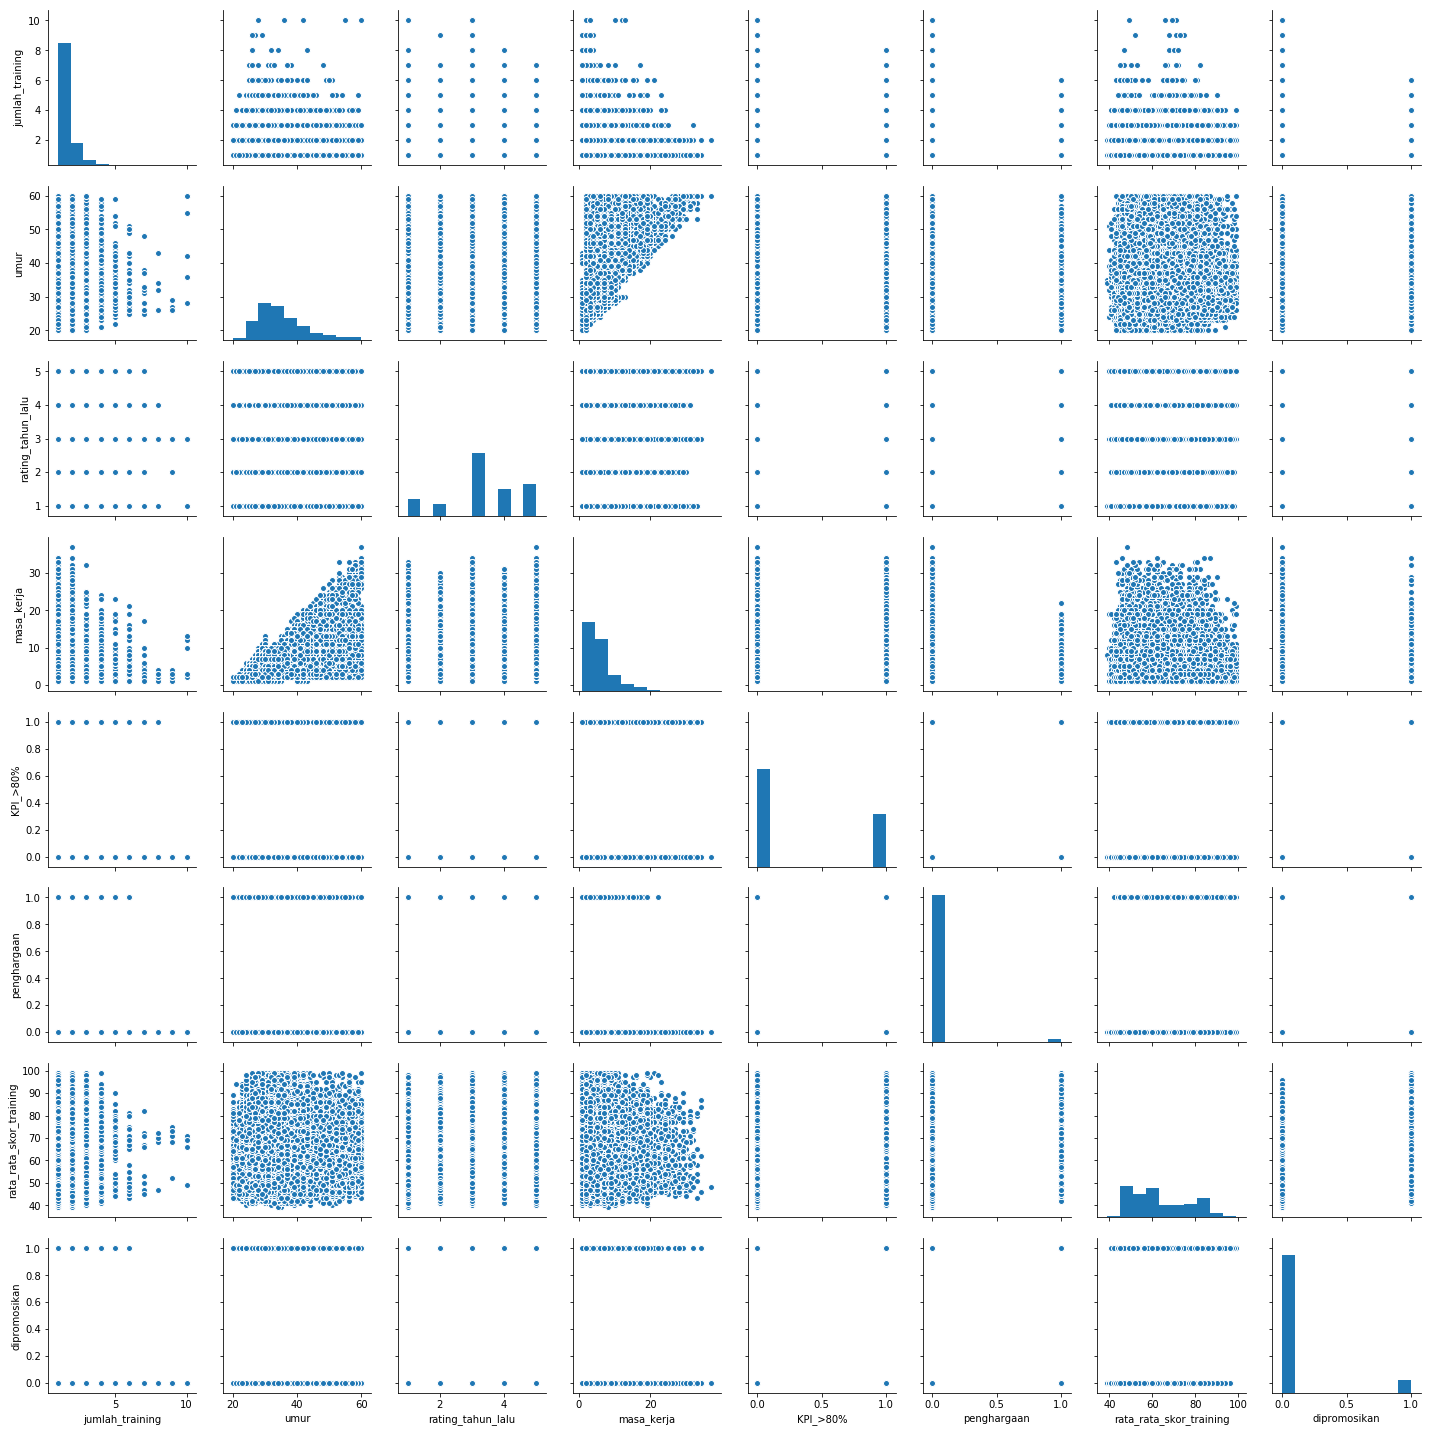

In [20]:
sns.pairplot(data=data)
plt.show()

Most of the data are not homogeneous

### Check Outliers

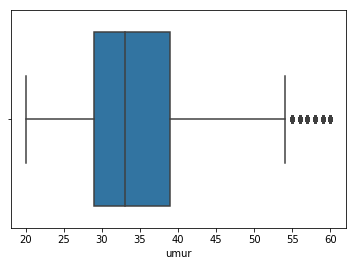

In [21]:
sns.boxplot(data['umur'])
plt.show()

I will keep the outliers

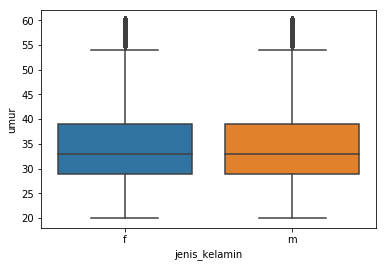

In [22]:
sns.boxplot(x=data['jenis_kelamin'], y=data['umur'])
plt.show()

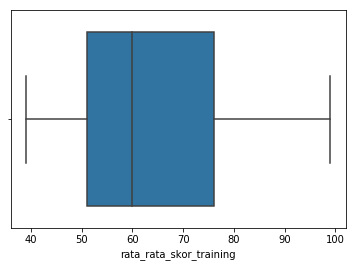

In [23]:
sns.boxplot(data['rata_rata_skor_training'])
plt.show()

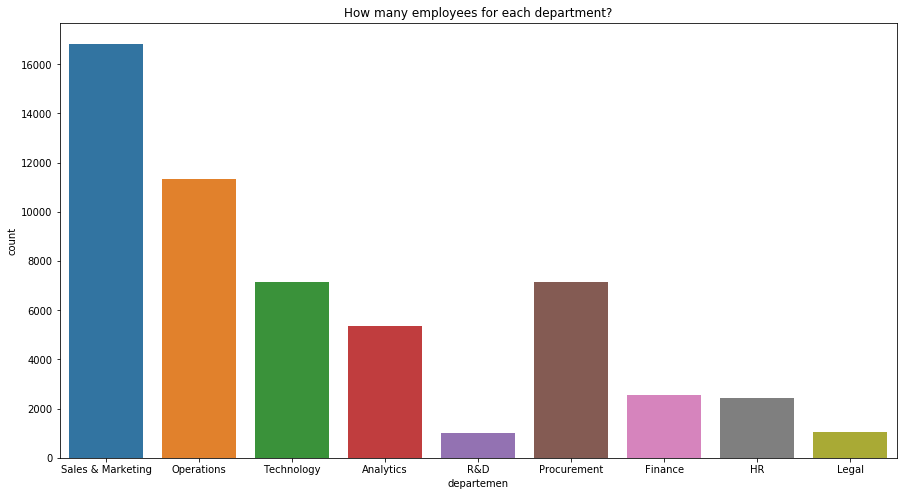

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x='departemen', data=data)
plt.title("How many employees for each department?")
plt.show()

In [25]:
# how many employees for each region?
data['wilayah'].value_counts()

wilayah_2     12343
wilayah_22     6428
wilayah_7      4843
wilayah_15     2808
wilayah_13     2648
wilayah_26     2260
wilayah_31     1935
wilayah_4      1703
wilayah_27     1659
wilayah_16     1465
wilayah_28     1318
wilayah_11     1315
wilayah_23     1175
wilayah_29      994
wilayah_32      945
wilayah_19      874
wilayah_20      850
wilayah_14      827
wilayah_25      819
wilayah_17      796
wilayah_5       766
wilayah_6       690
wilayah_30      657
wilayah_8       655
wilayah_10      648
wilayah_1       610
wilayah_24      508
wilayah_12      500
wilayah_9       420
wilayah_21      411
wilayah_3       346
wilayah_34      292
wilayah_33      269
wilayah_18       31
Name: wilayah, dtype: int64

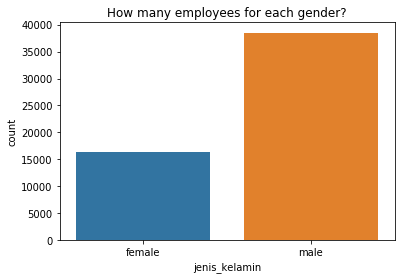

In [26]:
data['jenis_kelamin'].replace({'f':'female', 'm':'male'}, inplace=True)

sns.countplot(x='jenis_kelamin', data=data)
plt.title("How many employees for each gender?")
plt.show()

Most of the employees are men

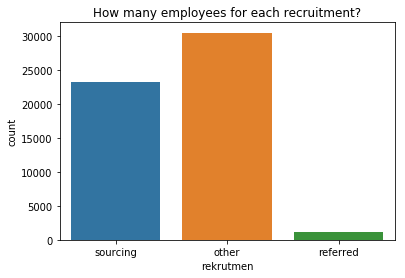

In [27]:
sns.countplot(x='rekrutmen', data=data)
plt.title("How many employees for each recruitment?")
plt.show()

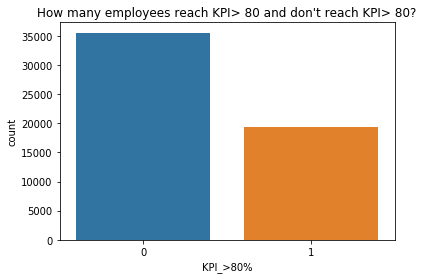

In [28]:
sns.countplot(x='KPI_>80%', data=data)
plt.title("How many employees reach KPI> 80 and don't reach KPI> 80?")
plt.show()

Most of the employees do not reach KPI> 80

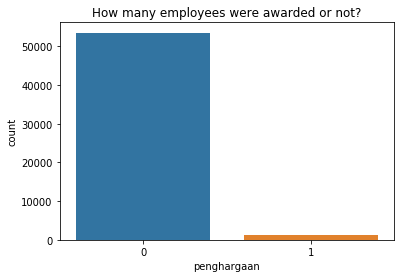

In [29]:
sns.countplot(x='penghargaan', data=data)
plt.title("How many employees were awarded or not?")
plt.show()

Most of the employees were not awarded

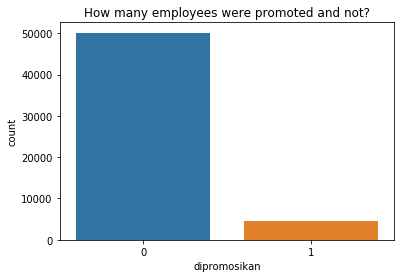

In [30]:
sns.countplot(x='dipromosikan', data=data)
plt.title("How many employees were promoted and not?")
plt.show()

Most of the employees were not promoted

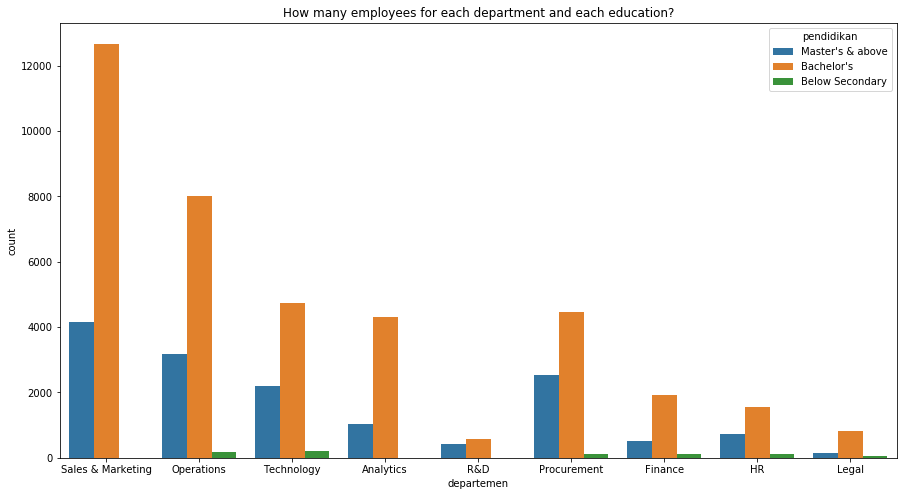

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(x='departemen', hue='pendidikan', data=data)
plt.title("How many employees for each department and each education?")
plt.show()

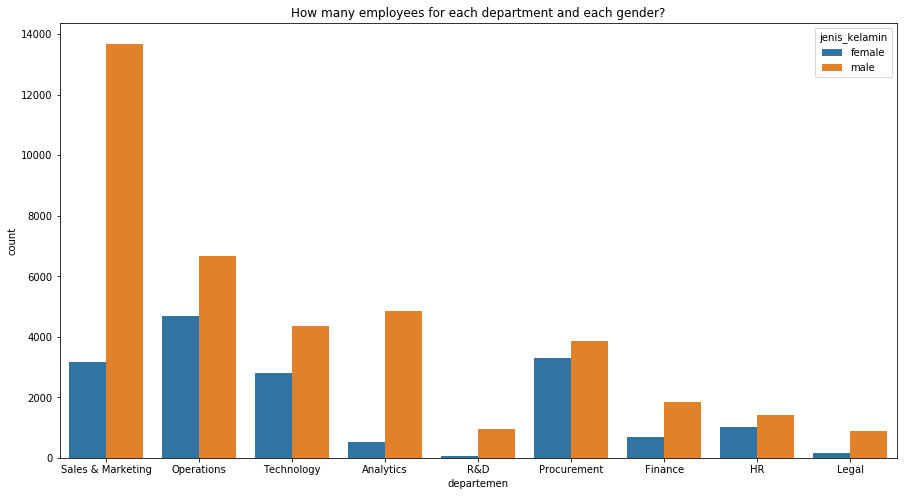

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x='departemen', hue='jenis_kelamin', data=data)
plt.title("How many employees for each department and each gender?")
plt.show()

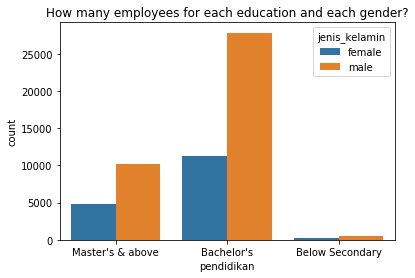

In [33]:
sns.countplot(x='pendidikan', hue='jenis_kelamin', data=data)
plt.title("How many employees for each education and each gender?")
plt.show()

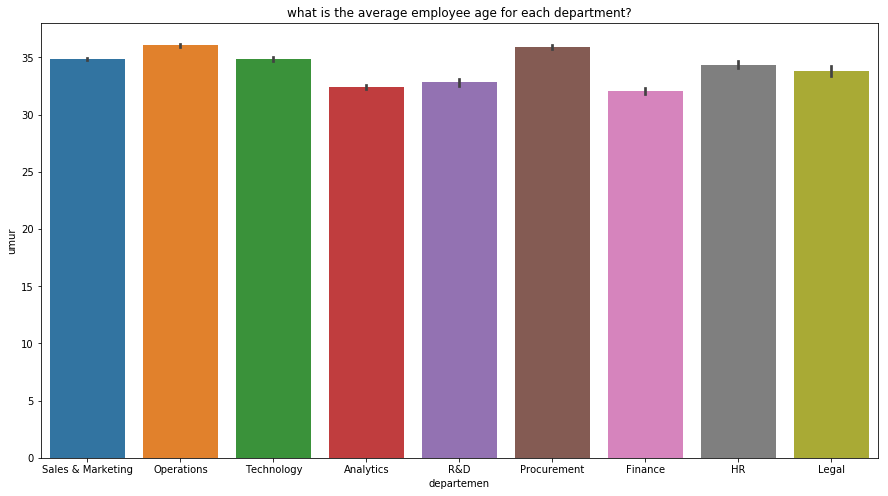

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x='departemen', y='umur', data=data)
plt.title("what is the average employee age for each department?")
plt.show()

The average age of employees for each department tends to be homogeneous, which is around 30s.

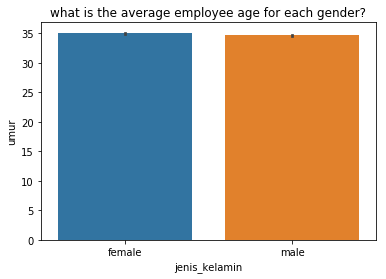

In [35]:
sns.barplot(x='jenis_kelamin', y='umur', data=data)
plt.title("what is the average employee age for each gender?")
plt.show()

That is same, around 30s

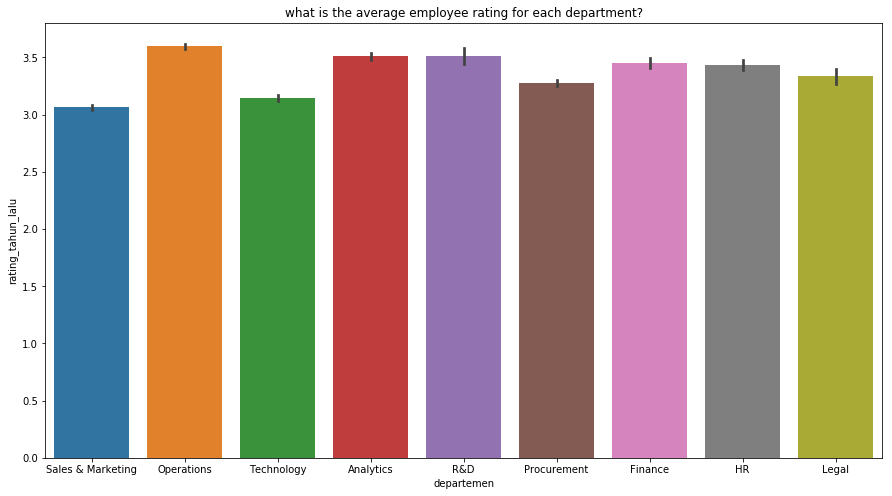

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(x='departemen', y='rating_tahun_lalu', data=data)
plt.title("what is the average employee rating for each department?")
plt.show()

Operations department has the biggest average rating which is above 3.5

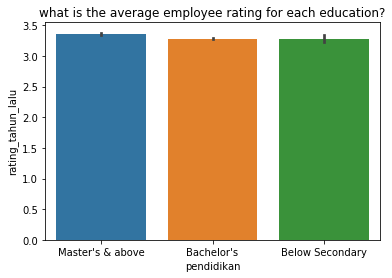

In [37]:
sns.barplot(x='pendidikan', y='rating_tahun_lalu', data=data)
plt.title("what is the average employee rating for each education?")
plt.show()

tend to be the same

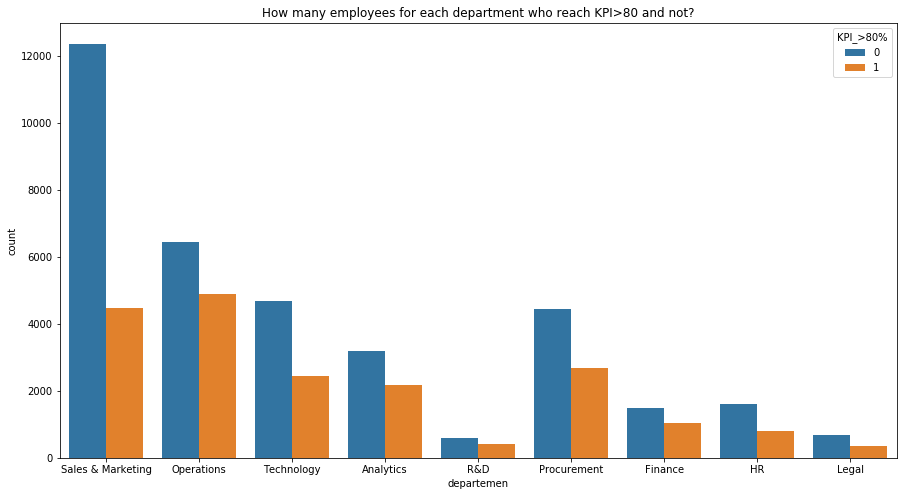

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(x='departemen', hue='KPI_>80%', data=data)
plt.title("How many employees for each department who reach KPI>80 and not?")
plt.show()

Sales & Marketing has a huge difference between employees who reach KPI> 80 and don't reach KPI> 80.

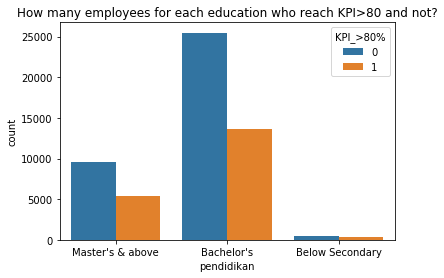

In [39]:
sns.countplot(x='pendidikan', hue='KPI_>80%', data=data)
plt.title("How many employees for each education who reach KPI>80 and not?")
plt.show()

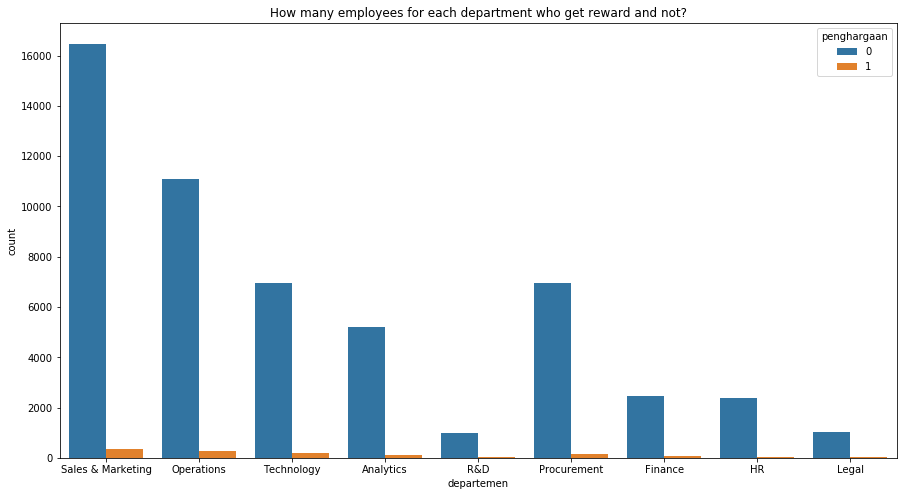

In [40]:
plt.figure(figsize=(15,8))
sns.countplot(x='departemen', hue='penghargaan', data=data)
plt.title("How many employees for each department who get reward and not?")
plt.show()

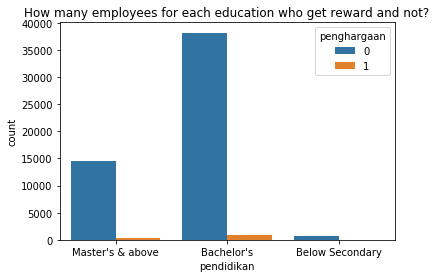

In [41]:
sns.countplot(x='pendidikan', hue='penghargaan', data=data)
plt.title("How many employees for each education who get reward and not?")
plt.show()

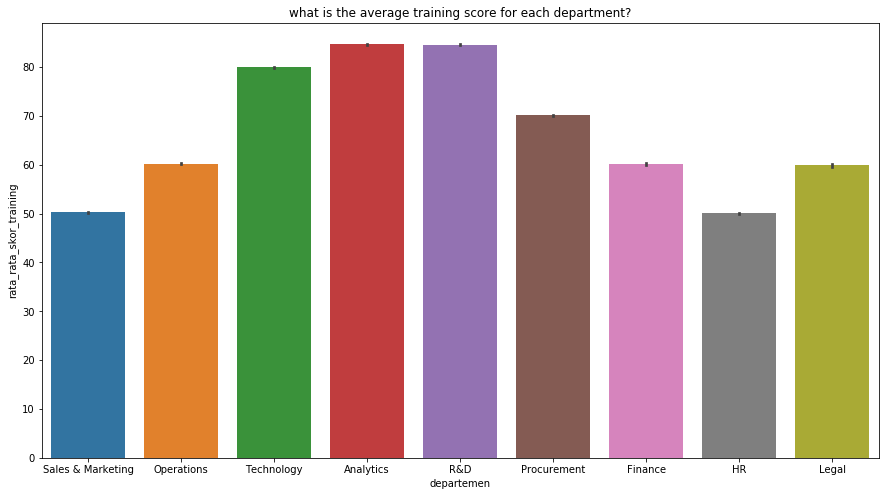

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(x='departemen', y='rata_rata_skor_training', data=data)
plt.title("what is the average training score for each department?")
plt.show()

Analytics and R&D department has the biggest average training score which is above 80

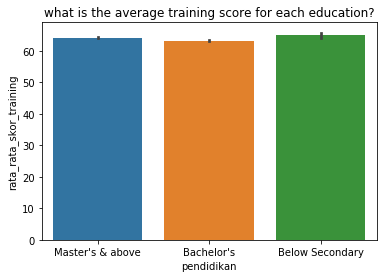

In [43]:
sns.barplot(x='pendidikan', y='rata_rata_skor_training', data=data)
plt.title("what is the average training score for each education?")
plt.show()

tend to be the same

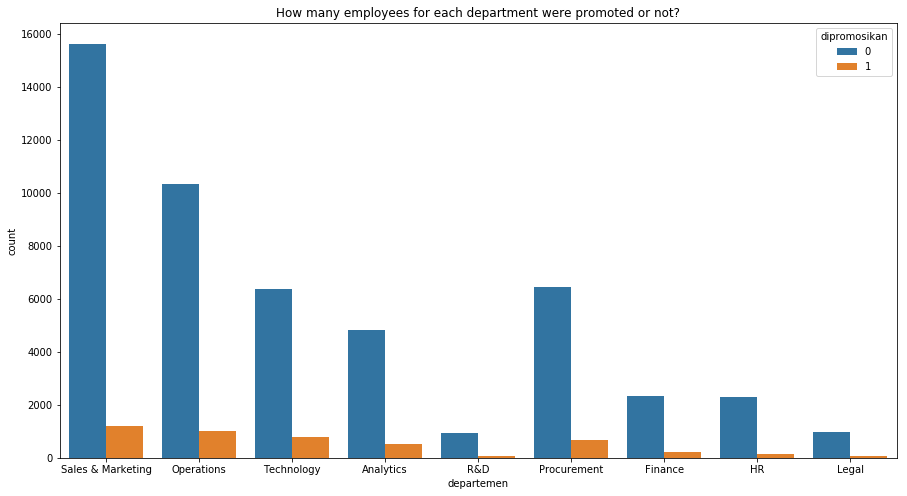

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(x='departemen', hue='dipromosikan', data=data)
plt.title("How many employees for each department were promoted or not?")
plt.show()

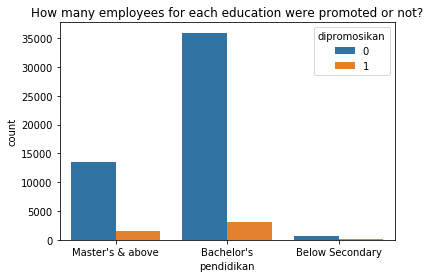

In [45]:
sns.countplot(x='pendidikan', hue='dipromosikan', data=data)
plt.title("How many employees for each education were promoted or not?")
plt.show()

# Feature Engineering

In [46]:
# num_feature are features that have a numeric data type
num_feature = ['jumlah_training','umur','rating_tahun_lalu','masa_kerja','KPI_>80%','penghargaan','rata_rata_skor_training','dipromosikan']

# cat_feature are features that have a categorical data type
cat_feature = ['departemen','wilayah','pendidikan','jenis_kelamin','rekrutmen']

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
# scaling for num_feature
for i in num_feature:
    data[[i]] = scaler.fit_transform(data[[i]])

data.head()

,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,Sales & Marketing,wilayah_7,Master's & above,female,sourcing,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,0.0
1,Operations,wilayah_22,Bachelor's,male,other,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,0.0
2,Sales & Marketing,wilayah_19,Bachelor's,male,sourcing,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333,0.0
3,Sales & Marketing,wilayah_23,Bachelor's,male,other,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333,0.0
4,Technology,wilayah_26,Bachelor's,male,other,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667,0.0


In [49]:
# create dummies feature for each categorical data types
for i in cat_feature:
    data = pd.concat([data, pd.get_dummies(data[i])], axis=1)

# drop features for each categorical data types
data.drop(['departemen','wilayah','pendidikan','jenis_kelamin','rekrutmen'], axis=1, inplace=True)

data.head()

,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan,Analytics,Finance,...,wilayah_8,wilayah_9,Bachelor's,Below Secondary,Master's & above,female,male,other,referred,sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,0.0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,0.0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333,0.0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333,0.0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667,0.0,0,0,...,0,0,1,0,0,0,1,1,0,0


# 2. Modelling

### Splitting Data

In [50]:
from sklearn.model_selection import train_test_split
X = data.drop(['dipromosikan'], axis=1)
y = data['dipromosikan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
y_pred = knn.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix, precision_score
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.27766463000678887
[[19046  1064]
 [ 1405   409]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     20110
         1.0       0.28      0.23      0.25      1814

    accuracy                           0.89     21924
   macro avg       0.60      0.59      0.59     21924
weighted avg       0.88      0.89      0.88     21924



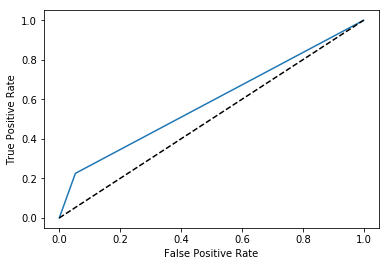

In [54]:
# Generate the probabilities
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [55]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.5862797886157556


I will optimize the AUC value with the elbow method.

In [56]:
error_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

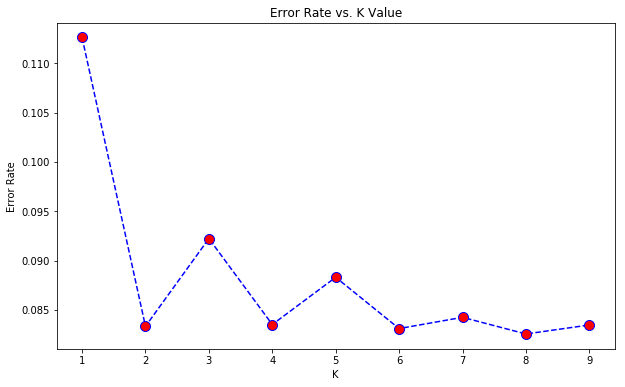

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

k = 2 is the optimal k value

In [58]:
# enter k = 2 (n_neighbors=2) into the model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [59]:
y_pred = knn.predict(X_test)

In [60]:
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.47796610169491527
[[19956   154]
 [ 1673   141]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     20110
         1.0       0.48      0.08      0.13      1814

    accuracy                           0.92     21924
   macro avg       0.70      0.54      0.54     21924
weighted avg       0.89      0.92      0.89     21924



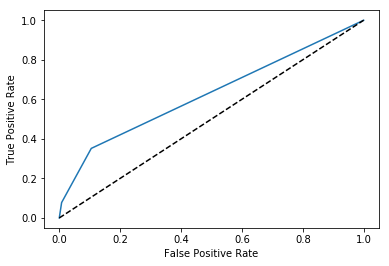

In [61]:
# Generate the probabilities
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [62]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.626055303877187


AUC value increased by about 4%

### Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [64]:
y_pred = nb.predict(X_test)

In [65]:
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.0955929816325333
[[ 4698 15412]
 [  185  1629]]
              precision    recall  f1-score   support

         0.0       0.96      0.23      0.38     20110
         1.0       0.10      0.90      0.17      1814

    accuracy                           0.29     21924
   macro avg       0.53      0.57      0.27     21924
weighted avg       0.89      0.29      0.36     21924



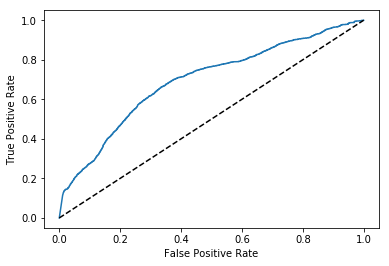

In [66]:
# Generate the probabilities
y_pred_prob = nb.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [67]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.6941455813313436


### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\prase\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [69]:
y_pred = logreg.predict(X_test)

In [70]:
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.845703125
[[20031    79]
 [ 1381   433]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.96     20110
         1.0       0.85      0.24      0.37      1814

    accuracy                           0.93     21924
   macro avg       0.89      0.62      0.67     21924
weighted avg       0.93      0.93      0.92     21924



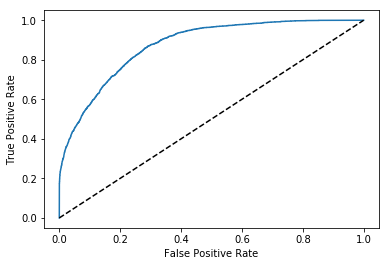

In [71]:
# Generate the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [72]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8736139079604621


### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred = dtree.predict(X_test)

In [75]:
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.41788143828960156
[[18912  1198]
 [  954   860]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95     20110
         1.0       0.42      0.47      0.44      1814

    accuracy                           0.90     21924
   macro avg       0.68      0.71      0.70     21924
weighted avg       0.91      0.90      0.90     21924



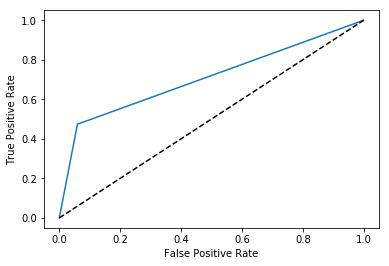

In [76]:
# Generate the probabilities
y_pred_prob = dtree.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [77]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.7071936488234227


### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
y_pred = rf.predict(X_test)

In [80]:
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.842832469775475
[[20019    91]
 [ 1326   488]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     20110
         1.0       0.84      0.27      0.41      1814

    accuracy                           0.94     21924
   macro avg       0.89      0.63      0.69     21924
weighted avg       0.93      0.94      0.92     21924



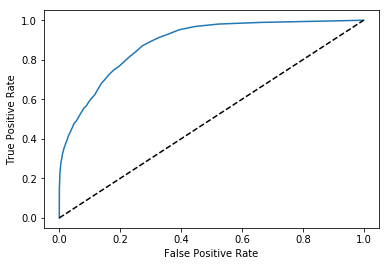

In [81]:
# Generate the probabilities
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [82]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8837602530075764


### XGBoost

In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

C:\Users\prase\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
y_pred = xgb.predict(X_test)

In [85]:
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8998628257887518
[[20037    73]
 [ 1158   656]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     20110
         1.0       0.90      0.36      0.52      1814

    accuracy                           0.94     21924
   macro avg       0.92      0.68      0.74     21924
weighted avg       0.94      0.94      0.93     21924



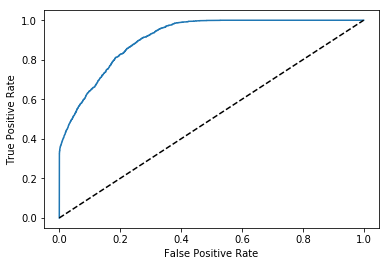

In [86]:
# Generate the probabilities
y_pred_prob = xgb.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [87]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9094437457270568


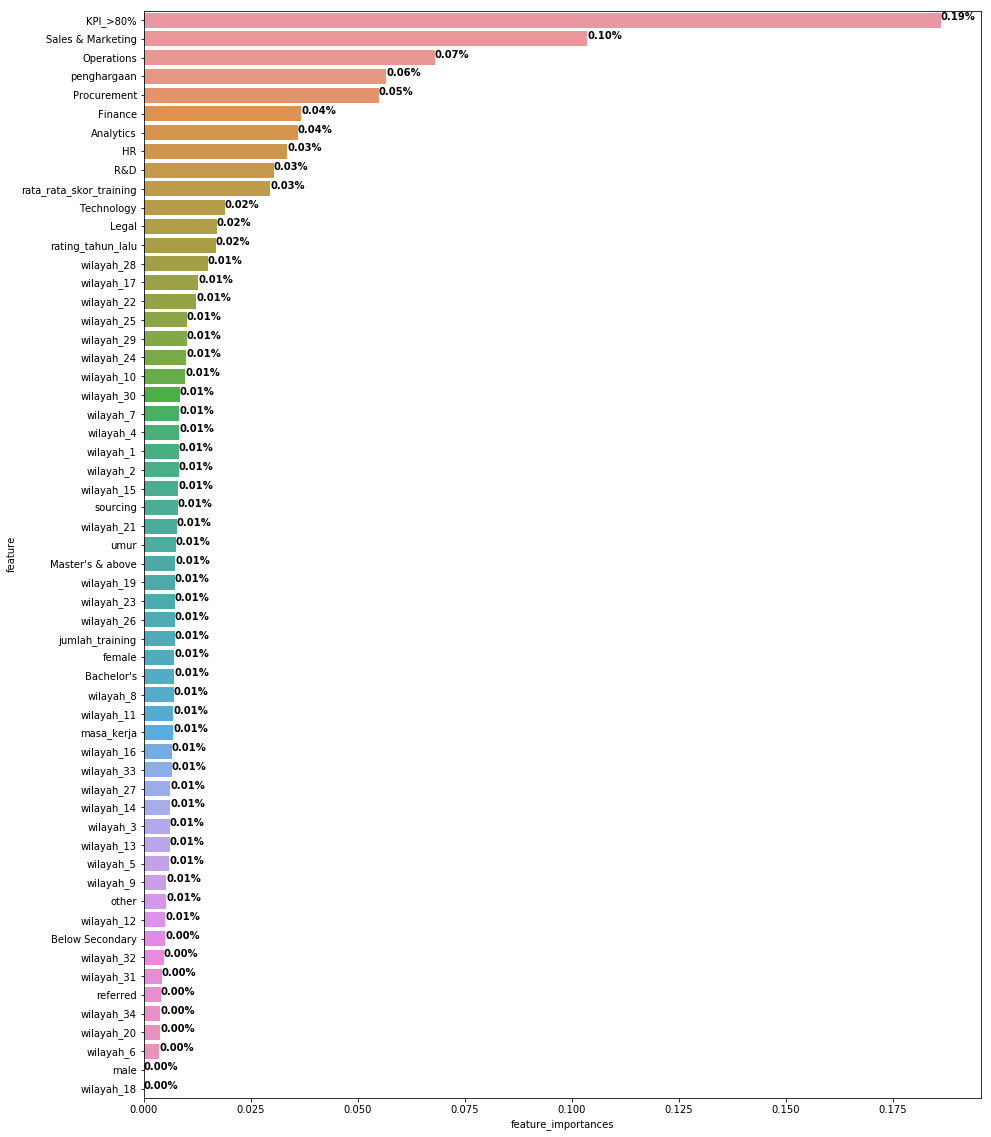

In [88]:
fi = pd.DataFrame(list(zip(X_train, xgb.feature_importances_)), columns=["feature","feature_importances"])
fi_sort = fi.sort_values(by=['feature_importances'], ascending=False)

plt.figure(figsize=(15,20))
ax = sns.barplot(x="feature_importances", y="feature", data=fi_sort, orient='h' )
for rect in ax.patches:
    ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f%%"% rect.get_width(), weight='bold' )
plt.show()

- KPI>80 is a feature of the highest feature importance value

# Model Selection

In [93]:
model = pd.DataFrame(np.array([['KNN', 62.6, 48],['Naive Bayes', 69.4, 10], ['Logistic Regression', 87.4, 85],
                               ['Decision Tree', 70.7, 42],['Random Forest', 88.4, 84], ['XGBoost', 90.9, 90]]), 
                    columns=['Model', 'AUC', 'Precision'])

model.sort_values(by='AUC', ascending=False)

,Model,AUC,Precision
5,XGBoost,90.9,90
4,Random Forest,88.4,84
2,Logistic Regression,87.4,85
3,Decision Tree,70.7,42
1,Naive Bayes,69.4,10
0,KNN,62.6,48


### The model I chose was XGBoost because it has the highest AUC value and the Precision value.
### AUC = 90,9%
### Precision = 90%

# 3. What will be your suggestion to deploy and maintain this model lifecycle?

Deploy Model using Flask:
1. Save the model into pickle file
2. Loading the saved model
3. Redirecting the API to the home page index.html
4. Redirecting the API to predict the result
5. Starting the flask server
6. Running the project

Maintain a model:
1. Save new training data as you receive it.
2. When you have enough new data, test its accuracy against your machine learning model.
3. If you see the accuracy of your model degrading over time, use the new data, or a combination of the new data and old training data to build and deploy a new model.